In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats

## Problem 1

Suppose the globe tossing data (Chapter 2) had turned out to be 4 water and 11 land. Construct the posterior distribution, using grid approximation. Use the same flat prior as in the book.

In [2]:
x_grid = np.linspace(0, 1, num=1000)

In [3]:
prior = np.repeat(1, 1000)

In [5]:
posterior = scipy.stats.binom.pmf(4, 15, x_grid)

In [7]:
posterior /= np.sum(posterior)

In [12]:
prior = prior / np.sum(prior)

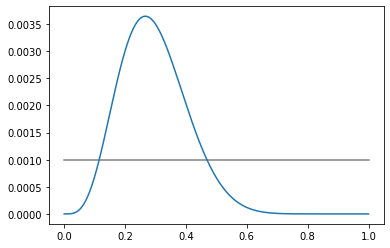

In [14]:
plt.plot(x_grid, prior, c="gray")
plt.plot(x_grid, posterior)

## Problem 2

Now suppose the data are 4 water and 2 land. Compute the posterior again, but this time use a prior that is zero below p = 0.5 and a constant above p = 0.5. This corresponds to prior information that a majority of the Earth’s surface is water.

In [17]:
prior = np.repeat(1, 1000)

In [18]:
prior[x_grid < 0.5] = 0

In [20]:
prior = prior / np.sum(prior)

In [21]:
posterior = scipy.stats.binom.pmf(4, 6, x_grid)

In [22]:
posterior = posterior * prior

In [23]:
posterior = posterior / posterior.sum()

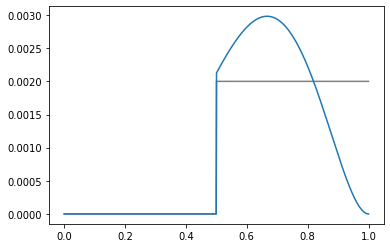

In [24]:
plt.plot(x_grid, prior, c="gray")
plt.plot(x_grid, posterior)

## Problem 3

For the posterior distribution from 2,compute 89% percentile and HPDI intervals. Compare the widths of these intervals. Which is wider? Why? If you had only the information in the interval, what might you misunderstand about the shape of the posterior distribution?

Let's compute 89% central percentile interval first

In [45]:
l = np.where(posterior.cumsum() > 11/2/100)[0][0]

In [46]:
u = np.where(posterior.cumsum() < 0.89 + 11/2/100)[0][-1]

Computing highest posterior density around the max point

In [48]:
cdf = posterior.cumsum()
max_ = posterior.argmax()

In [58]:
hpdi_u = np.where(cdf - cdf[max_] < 0.89 / 2)[0][-1]

In [62]:
hpdi_l = np.where(cdf - cdf[max_] > -0.89 / 2)[0][0]

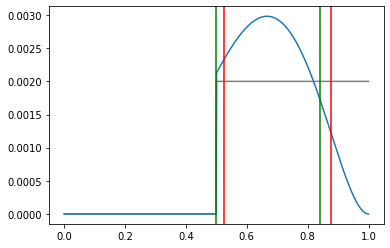

In [63]:
plt.plot(x_grid, prior, c="gray")
plt.plot(x_grid, posterior)
plt.axvline(x_grid[l - 1], c="red")
plt.axvline(x_grid[u], c="red")
plt.axvline(x_grid[hpdi_l - 1], c="green")
plt.axvline(x_grid[hpdi_u], c="green")

In [71]:
ci_width = u - l
hpdi_width = hpdi_u - hpdi_l

In [70]:
ci_width, l, u

(353, 524, 877)

In [69]:
hpdi_width, hpdi_l, hpdi_u

(340, 500, 840)

## Problem 4

Suppose there is bias in sampling so that Land is more likely than Water to be recorded. Specifically, assume that 1-in-5 (20%) of Water samples are accidentally recorded instead as ”Land”. First, write a generative simulation of this sampling process. Assuming the true proportion of Water is 0.70, what proportion does your simulation tend to produce instead? Second, using a simulated sample of 20 tosses, compute the unbiased posterior distribution of the true proportion of water.

In [84]:
true = np.random.binomial(1, 0.7, size=10000)

In [85]:
biased = np.random.binomial(1, 0.2, size=true.sum())

In [86]:
(true.sum() - biased.sum()) / true.size

0.5533

In [88]:
0.7 - 0.7 * 0.2

0.5599999999999999

In [131]:
true = np.random.binomial(1, 0.7, size=20)

In [132]:
biased = np.random.binomial(1, 0.2, size=true.sum())

In [133]:
n_water = true.sum() - biased.sum()

In [134]:
print(f"Number of waters out of 20: {n_water}")

Number of waters out of 20: 9


My way

In [135]:
posterior = np.repeat(0.0, x_grid.size)
for i in range(n_water, 21):
    posterior += scipy.stats.binom.pmf(i, 20, x_grid) * scipy.stats.binom.pmf(i - n_water, i, 0.2)

In [136]:
posterior = posterior / posterior.sum()

Looked at the solutions

In [138]:
posterior2 = scipy.stats.binom.pmf(9, 20, x_grid * 0.8)

In [140]:
posterior2 = posterior2 / posterior2.sum()

Biased posterior

In [142]:
posterior3 = scipy.stats.binom.pmf(9, 20, x_grid)
posterior3 = posterior3 / posterior3.sum()

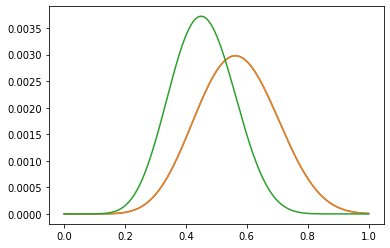

In [143]:
plt.plot(x_grid, posterior)
plt.plot(x_grid, posterior2)
plt.plot(x_grid, posterior3)